<a href="https://colab.research.google.com/github/Enriquebadenas/Stats-Python/blob/main/load_data_colab4_meancomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#First we import and load all basic libraries

import os
from google.colab import drive # For linking colab to Google Drive
import pandas as pd # For dataframe handling
import numpy as np # For matrix and list computations
import matplotlib.pyplot as plt # For advanced graphs
import scipy.stats as stats
import seaborn as sns
from pandas.api.types import CategoricalDtype

drive.mount('mydrive') #Bridge to Google Drive


Drive already mounted at mydrive; to attempt to forcibly remount, call drive.mount("mydrive", force_remount=True).


In [ ]:
# wbr= pd.read_excel (‘Path to file in Google drive’) #Load data

datos = pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/EDEM Colab/datos_prueba2.csv', sep=',', decimal='.')
# df #Visualise dataframe


In [ ]:
datos.shape
datos

,num,Fecha,Modelo_ofertado,Precio,Market
0,1,20/9/2021,NaN,4.011,NaN
1,2,20/9/2021,NaN,19.852,NaN
2,3,27/9/2021,352.0,70.438,Food
3,4,27/9/2021,302.0,46.099,Automotive
4,5,27/9/2021,301.0,35.627,Chem
5,6,27/9/2021,202.0,34.794,Food
6,7,4/10/2021,302.0,52.109,Automotive
7,8,5/10/2021,352.0,50.313,Food
8,9,7/10/2021,302.0,46.099,Automotive
9,10,8/10/2021,302.0,46.099,Food


La tabla muestra un índice de referencia asignado por Python, una columna "num" que coincide en este caso con el índice, "Fecha" como fecha de venta/oferta de los equipos, "Modelo Ofertado" valor numérico del modelo del equipo, "Precio" como precio de venta, difiere dentro de un mismo modelo por los extras añadidos. Esta última columna "Market" hace referencia al sector productivo de la fábrica que ha adquirido el equipo. 

In [ ]:
mytable = datos.groupby(['Modelo_ofertado']).size()
mytable


Modelo_ofertado
132.0    1
202.0    1
301.0    1
302.0    6
303.0    1
352.0    4
353.0    3
453.0    1
dtype: int64

Mi tabla de porcentajes

In [ ]:
mytable.describe()

count    8.000000
mean     2.250000
std      1.908627
min      1.000000
25%      1.000000
50%      1.000000
75%      3.250000
max      6.000000
dtype: float64

In [ ]:
n = mytable.sum()
mytable2 = (mytable/n)*100


print(mytable2)
mytable3 = round(mytable2,1)

Modelo_ofertado
132.0     5.555556
202.0     5.555556
301.0     5.555556
302.0    33.333333
303.0     5.555556
352.0    22.222222
353.0    16.666667
453.0     5.555556
dtype: float64


In [ ]:
# recode variable numérica a nominal
datos.loc[(datos['Modelo_ofertado']==132), "size"]="Small"
datos.loc[(datos['Modelo_ofertado']==202), "size"]="Small"
datos.loc[(datos['Modelo_ofertado']==301), "size"]="Medium"
datos.loc[(datos['Modelo_ofertado']==302), "size"]="Medium"
datos.loc[(datos['Modelo_ofertado']==303), "size"]="Medium"
datos.loc[(datos['Modelo_ofertado']==352), "size"]="Large"
datos.loc[(datos['Modelo_ofertado']==353), "size"]="Large"
datos.loc[(datos['Modelo_ofertado']==453), "size"]="ExtraLarge"

datos

,num,Fecha,Modelo_ofertado,Precio,Market,size
0,1,20/9/2021,NaN,4.011,NaN,NaN
1,2,20/9/2021,NaN,19.852,NaN,NaN
2,3,27/9/2021,352.0,70.438,Food,Large
3,4,27/9/2021,302.0,46.099,Automotive,Medium
4,5,27/9/2021,301.0,35.627,Chem,Medium
5,6,27/9/2021,202.0,34.794,Food,Small
6,7,4/10/2021,302.0,52.109,Automotive,Medium
7,8,5/10/2021,352.0,50.313,Food,Large
8,9,7/10/2021,302.0,46.099,Automotive,Medium
9,10,8/10/2021,302.0,46.099,Food,Medium


In [ ]:
datos.dtypes

num                  int64
Fecha               object
Modelo_ofertado    float64
Precio             float64
Market              object
size                object
dtype: object

In [ ]:
my_categories = ['Small', 'Medium', 'Large', 'ExtraLarge'] # lista de categorías ordenadas


In [ ]:
my_data_type = CategoricalDtype(categories=my_categories, ordered=True) # creación nueva clase de variables


In [ ]:
datos['size_ord'] = datos['size'].astype(my_data_type) # creando la nueva columna con las categorías ordenados
datos

,num,Fecha,Modelo_ofertado,Precio,Market,size,size_ord
0,1,20/9/2021,NaN,4.011,NaN,NaN,NaN
1,2,20/9/2021,NaN,19.852,NaN,NaN,NaN
2,3,27/9/2021,352.0,70.438,Food,Large,Large
3,4,27/9/2021,302.0,46.099,Automotive,Medium,Medium
4,5,27/9/2021,301.0,35.627,Chem,Medium,Medium
5,6,27/9/2021,202.0,34.794,Food,Small,Small
6,7,4/10/2021,302.0,52.109,Automotive,Medium,Medium
7,8,5/10/2021,352.0,50.313,Food,Large,Large
8,9,7/10/2021,302.0,46.099,Automotive,Medium,Medium
9,10,8/10/2021,302.0,46.099,Food,Medium,Medium


col_0       count
size_ord         
Small        11.1
Medium       44.4
Large        38.9
ExtraLarge    5.6


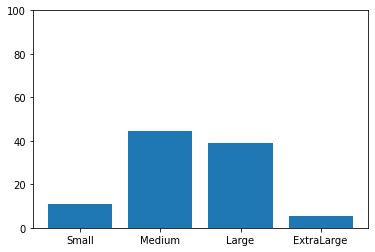

In [ ]:
#frequencies & barchart (nominal variable)
mytable = pd.crosstab(datos['size_ord'], columns="count", normalize='columns')*100
print (round(mytable,1))
plt.bar(mytable.index, mytable['count'])
plt.ylim(0,100)
plt.show()

In [ ]:
mytable = pd.crosstab(index=datos["size_ord"], columns="count") # Crosstab
n=mytable.sum()
mytable2 = (mytable/n)*100
print(mytable2)

col_0           count
size_ord             
Small       11.111111
Medium      44.444444
Large       38.888889
ExtraLarge   5.555556


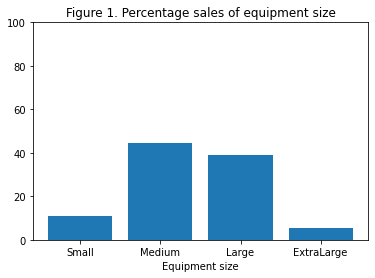

In [ ]:
plt.bar(mytable2.index, mytable2['count'])
plt.xlabel('Equipment size')
plt.title('Figure 1. Percentage sales of equipment size')
plt.ylim(0,100)
plt.show()

No tengo necesidad de recodificar mi variable independiente "Market" porque ya es categórica.

In [ ]:
pd.crosstab(datos['size_ord'], datos['Market'], normalize='columns', margins=True)*100 # normalizamos por columnas y x100 para %

Market,Automotive,Chem,Food,All
size_ord,,,,
Small,0.0,25.0,10.0,11.111111
Medium,100.0,50.0,20.0,44.444444
Large,0.0,25.0,60.0,38.888889
ExtraLarge,0.0,0.0,10.0,5.555556


Comprobación con la crosstab de que los datos están agrupados correctamente y el total suma 100%

In [ ]:
my_ct = pd.crosstab(datos['size_ord'], datos['Market'], normalize='columns', margins=True)*100
my_ct

round(my_ct, 1)

Market,Automotive,Chem,Food,All
size_ord,,,,
Small,0.0,25.0,10.0,11.1
Medium,100.0,50.0,20.0,44.4
Large,0.0,25.0,60.0,38.9
ExtraLarge,0.0,0.0,10.0,5.6


In [ ]:
# Statistical test
ct = pd.crosstab(datos['size_ord'], datos['Market']) # var dependiente contra la independiente. 
ct

Market,Automotive,Chem,Food
size_ord,,,
Small,0,1,1
Medium,4,2,2
Large,0,1,6
ExtraLarge,0,0,1


In [ ]:
stats.chi2_contingency(ct)

(9.0, 0.17357807091003602, 6, array([[0.44444444, 0.44444444, 1.11111111],
        [1.77777778, 1.77777778, 4.44444444],
        [1.55555556, 1.55555556, 3.88888889],
        [0.22222222, 0.22222222, 0.55555556]]))

de la prueba Chi^2, p-value = 0.17 por lo tanto superior a 0.05 y no se puede decir con un intervalo de confianza del 95% que el tipo de mercado tenga influencia sobre el tamaño de los equipos vendidos.

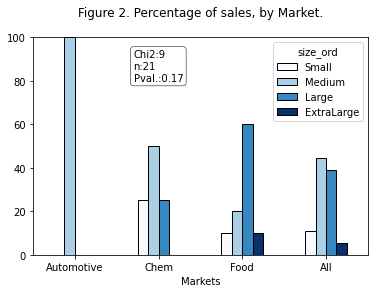

In [ ]:
my_ct2 = my_ct.transpose()

# mapas de colores en Python. eligiendo sequential colormaps. slide 
my_ct2.plot(kind='bar', edgecolor='black', colormap='Blues')
plt.ylim(0,100)
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(0.7,80,'Chi2:9''\n''n:21' '\n' 'Pval.:0.17', bbox=props)
plt.xlabel('Markets')
plt.title('Figure 2. Percentage of sales, by Market.\n')
plt.xticks(rotation='horizontal')
plt.show()

# Interpretación del ejercicio.
He cargado un dataset desde un fichero csv. He agrupado por el campo "Modelo_ofertado" para posteriormente realizar un cambio de variable numérica a nominal englobando los modelos por su talla: Small, Medium, Large, Extralarge.
He ordenado las nuevas categorías, las tallas en este caso, y las he transformado a categóricas.
No me ha hecho falta recodificar la variable independiente "Market" porque no es numérica, ya es categórica. El p-value ha resultado de 0.17 y al ser > 0.05 indica que no hay relación entre el tamaño de los equipos vendidos y el tipo de mercado al que pertenecen.
El tamaño de los equipos dependerá del tamaño de la fábrica, no del sector al que pertenezca.